In [1]:
pip install wordcloud

## Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathered from Source

 Dataset (News_Category_Dataset_v3.json) from Kaggle's website for News & Article Recommendation System

## Data Accessing

In [3]:
news_article = pd.read_json("News_Category_Dataset_v3.json",lines=True)

In [4]:
news_article.head(10)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22
6,https://www.huffpost.com/entry/reporter-gets-a...,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22
7,https://www.huffpost.com/entry/puerto-rico-wat...,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS,More than half a million people remained witho...,"DÁNICA COTO, AP",2022-09-22
8,https://www.huffpost.com/entry/mija-documentar...,How A New Documentary Captures The Complexity ...,CULTURE & ARTS,"In ""Mija,"" director Isabel Castro combined mus...",Marina Fang,2022-09-22
9,https://www.huffpost.com/entry/biden-un-russia...,Biden At UN To Call Russian War An Affront To ...,WORLD NEWS,White House officials say the crux of the pres...,"Aamer Madhani, AP",2022-09-21


In [5]:
news_article.shape

(209527, 6)

In [6]:
news_article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [7]:
news_article.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

## Data Preprocessing

In [8]:
news_article['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [9]:
news_article['authors'].value_counts()

authors
                                                                          37418
Lee Moran                                                                  2954
Ron Dicker                                                                 2219
Ed Mazza                                                                   1590
Mary Papenfuss                                                             1566
                                                                          ...  
Holly Ramer, Associated Press                                                 1
Gina Carey, The Huffington Post                                               1
Randall Chase, Associated Press                                               1
Stephen Ohlemacher, AP                                                        1
John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff        1
Name: count, Length: 29169, dtype: int64

In [10]:
news_article['authors'] = news_article['authors'].replace('', np.nan)

In [11]:
news_article['authors'].isnull().sum()

37418

In [12]:
news_article.dropna(subset=['authors'],inplace=True)

In [13]:
news_article['authors'].isnull().sum()

0

In [14]:
news_article.shape

(172109, 6)

In [15]:
news_article.duplicated().sum()

0

## Data Analysis

In [16]:
analysis_data = news_article.sample(1000)

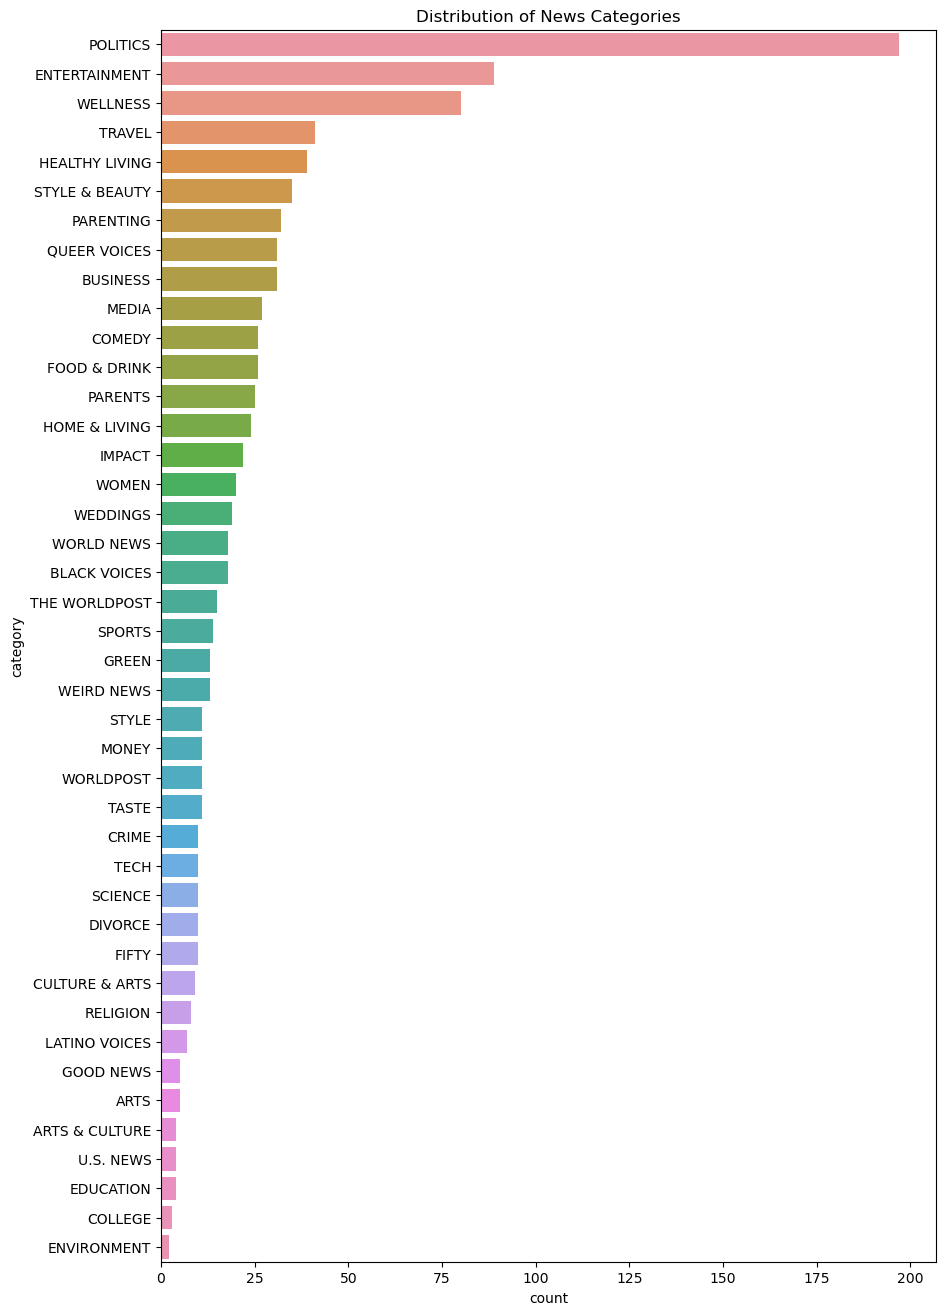

In [17]:
plt.figure(figsize=(10, 16))
sns.countplot(y='category', data=analysis_data, order=analysis_data['category'].value_counts().index)
plt.title('Distribution of News Categories')
plt.show()

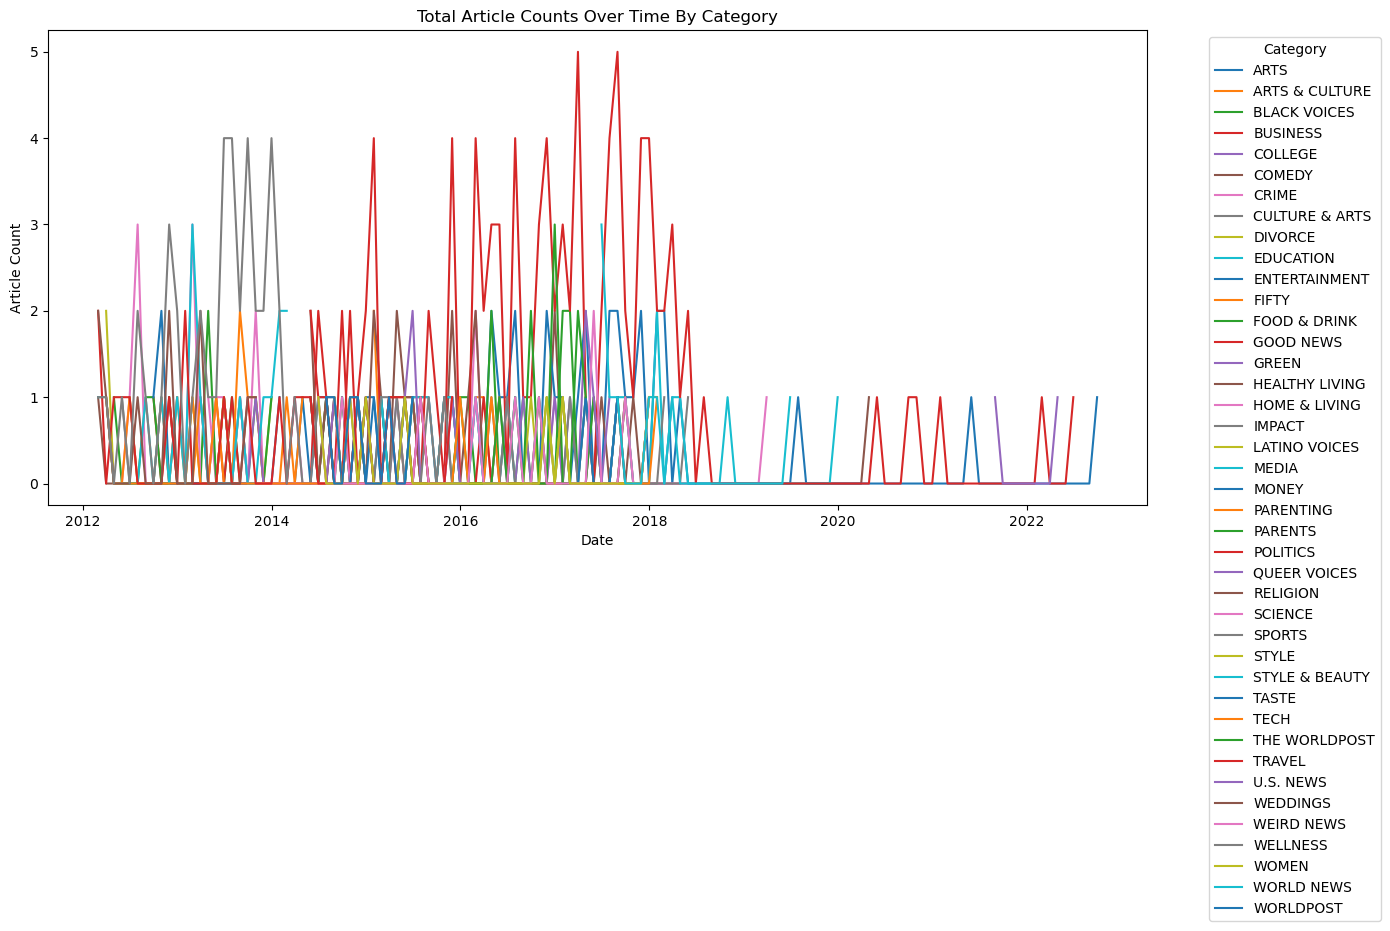

In [18]:
category_date = analysis_data.head(500)

category_date.set_index('date', inplace=True)
monthly_counts = category_date.groupby('category')['headline'].resample('M').count().unstack(0)

plt.figure(figsize=(14, 8))
for category in monthly_counts.columns:
    plt.plot(monthly_counts.index, monthly_counts[category], label=category)
    
plt.title('Total Article Counts Over Time By Category')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

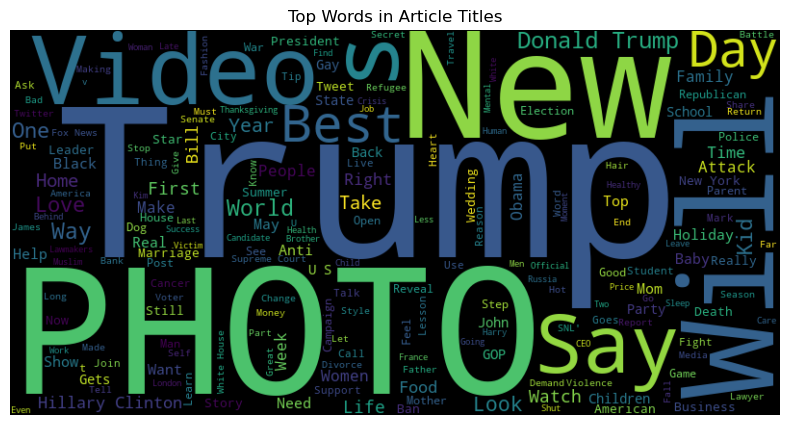

In [19]:
from wordcloud import WordCloud

text = ' '.join(analysis_data['headline'])
wordcloud = WordCloud(width=800, height=400, max_words=200).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in Article Titles')
plt.show()

In [20]:
# Calculate article length (number of words in headline + short_description)
analysis_data['headline_length'] = analysis_data['headline'].apply(lambda x: len(x.split()))
analysis_data['description_length'] = analysis_data['short_description'].apply(lambda x: len(x.split()))
analysis_data['article_length'] = analysis_data['headline_length'] + analysis_data['description_length']

# Plot histograms for each category
categories = analysis_data['category'].unique()

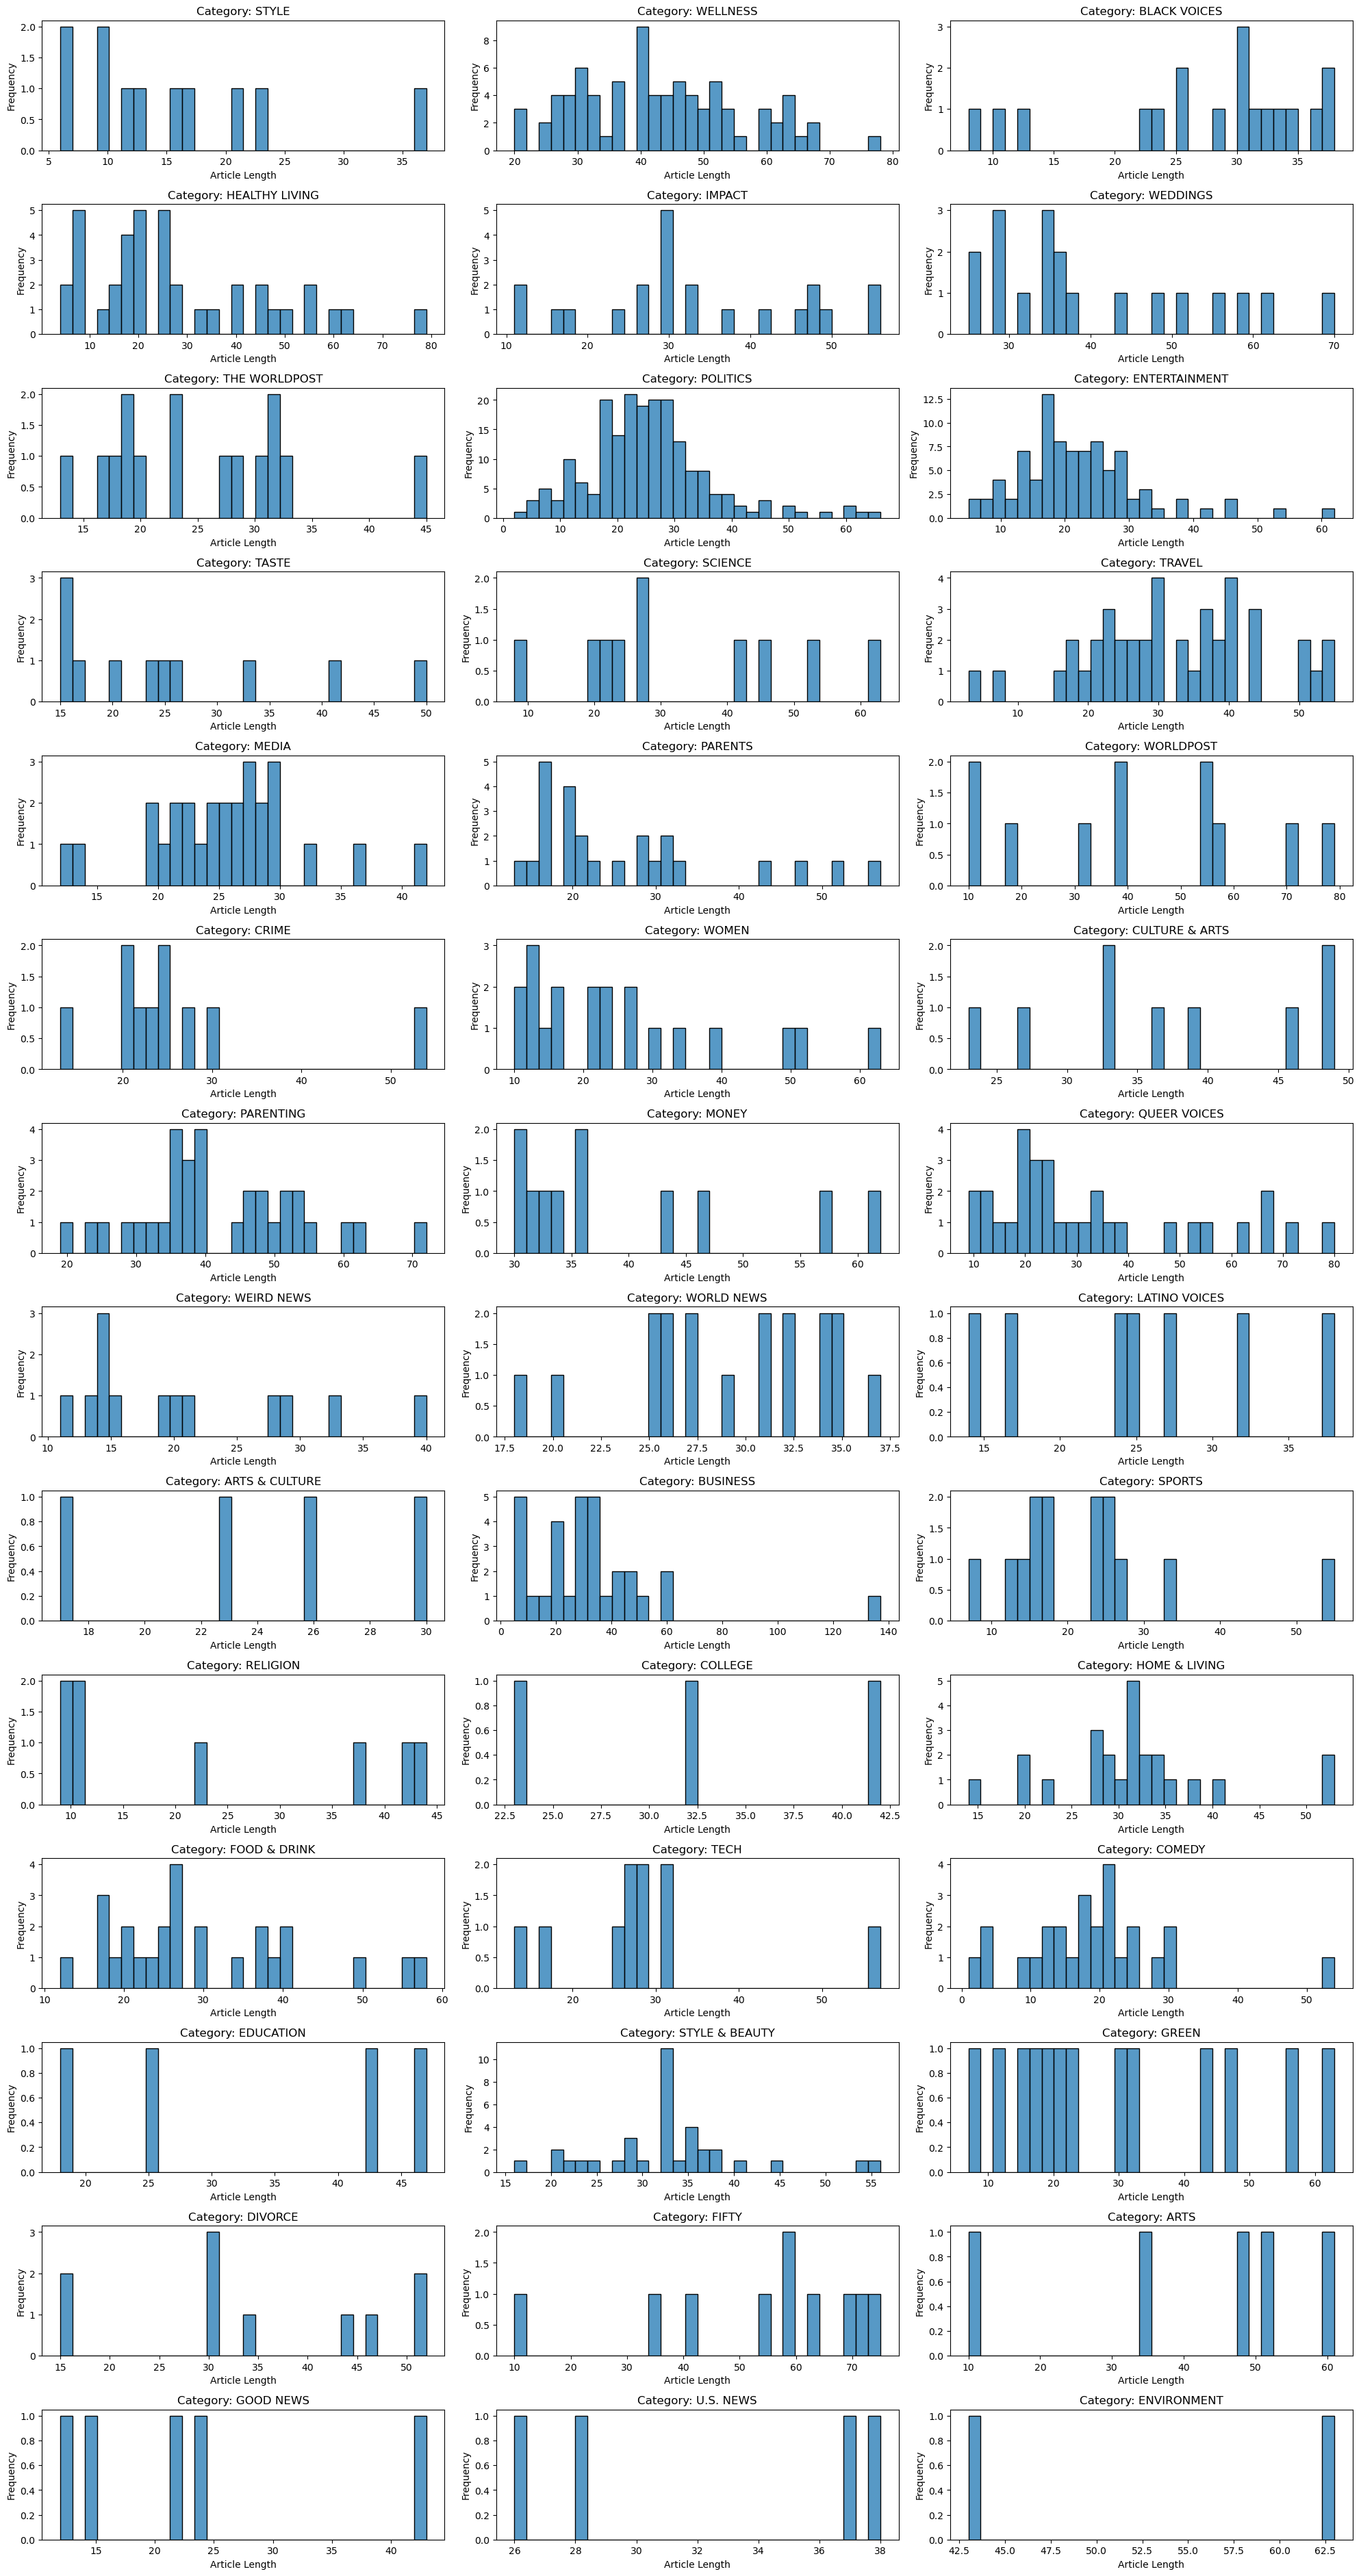

In [21]:
plt.figure(figsize=(20, 40))  # Adjust the figsize for better visualization

for i, category in enumerate(categories):
    plt.subplot(len(categories)//3 + 1, 3, i + 1)  # Create a subplot for each category
    sns.histplot(analysis_data[analysis_data['category'] == category]['article_length'], bins=30, kde=False)
    plt.title(f'Category: {category}')
    plt.xlabel('Article Length')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

In [22]:
import nltk

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment scores
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

In [24]:
# Calculate sentiment scores for headlines and short descriptions
analysis_data['headline_sentiment'] = analysis_data['headline'].apply(get_sentiment_score)
analysis_data['description_sentiment'] = analysis_data['short_description'].apply(get_sentiment_score)

# Calculate the average sentiment score for each article
analysis_data['average_sentiment'] = analysis_data[['headline_sentiment', 'description_sentiment']].mean(axis=1)

# Group by category and calculate the average sentiment score
average_sentiment_by_category = analysis_data.groupby('category')['average_sentiment'].mean().reset_index()
average_sentiment_by_category

,category,average_sentiment
0,ARTS,0.202190
1,ARTS & CULTURE,-0.170625
2,BLACK VOICES,-0.060417
3,BUSINESS,0.004350
4,COLLEGE,-0.065850
5,COMEDY,0.007283
6,CRIME,-0.202095
7,CULTURE & ARTS,0.058200
8,DIVORCE,0.214665
9,EDUCATION,0.179350


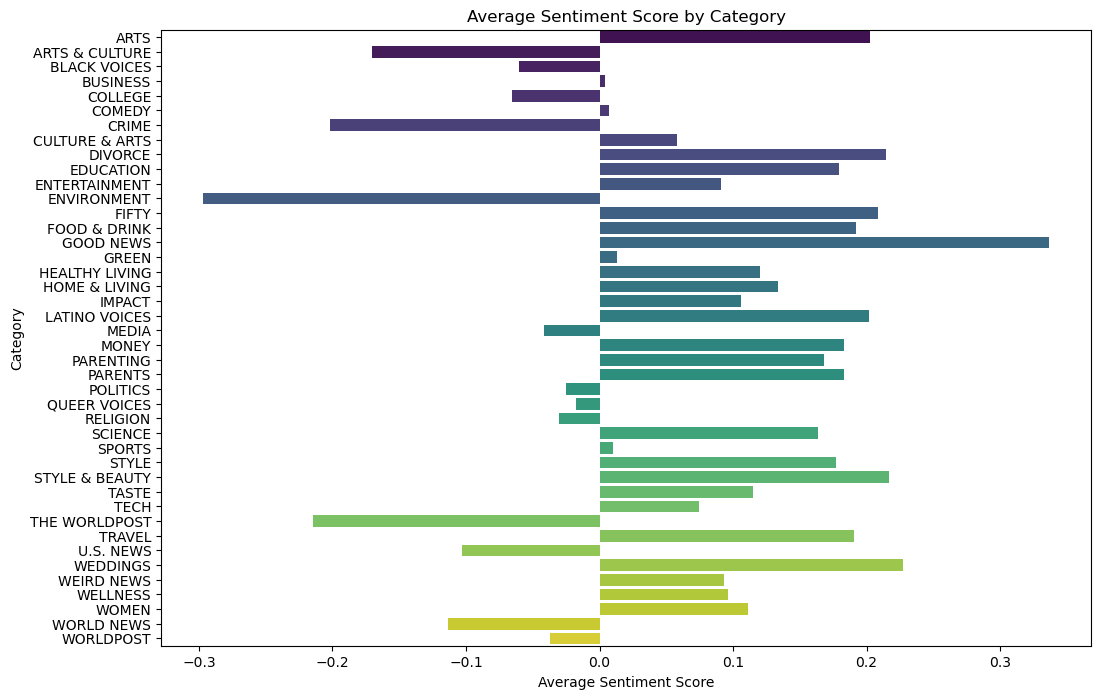

In [25]:
# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=average_sentiment_by_category, x='average_sentiment', y='category', palette='viridis')
plt.title('Average Sentiment Score by Category')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Category')
plt.show()

 # Content Based Recommender System

In [26]:
news_article.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172109 entries, 0 to 209522
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               172109 non-null  object        
 1   headline           172109 non-null  object        
 2   category           172109 non-null  object        
 3   short_description  172109 non-null  object        
 4   authors            172109 non-null  object        
 5   date               172109 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [27]:
news_article['short_description'].head(1)

0    Health experts said it is too early to predict...
Name: short_description, dtype: object

In [28]:
subset_news_article = news_article.sample(n=1000, random_state=42)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',max_features=10000)
tfv_matrix = vectorizer.fit_transform(subset_news_article['short_description'])

# Filling NaNs with empty string
subset_news_article['short_description'].isnull().sum()

0

In [30]:
tfv_matrix.shape

(1000, 4899)

In [31]:
tfv_matrix

<1000x4899 sparse matrix of type '<class 'numpy.float64'>'
	with 9487 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
similarity_matrix = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [33]:
similarity_matrix[1]

array([0.76159416, 0.76167987, 0.76159661, 0.76159416, 0.76159416,
       0.76159416, 0.76159873, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76160101,
       0.76160281, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159829,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159836, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159

In [34]:
subset_news_article['headline'].drop_duplicates()

73133     If You Think Flying Is Bad Now, Check Out This...
149896    Is Corporate Philanthropy Dead as We Know It, ...
147895                Is Apple About Fashion or Technology?
209114    Super Bowl Foods: HOW Many Calories Do Those A...
30705     Former Congresswoman Pens Emotional Plea To Co...
                                ...                        
12441     Lawyers File To Prosecute Myanmar Civil Leader...
120437    News For High Schools: Digital Media Plus Teac...
165944        Being a 'Mama': My Most Important Job in Life
37056     Stephen Colbert: President Trump's Wall Is Sta...
64152     Trump's Big Los Angeles Fundraiser Last Month?...
Name: headline, Length: 998, dtype: object

In [35]:
unique_headlines_indices = list(subset_news_article[['headline']].values.ravel())
unique_headlines_indices

['If You Think Flying Is Bad Now, Check Out This Terrifying Vintage Airplane Cabin',
 'Is Corporate Philanthropy Dead as We Know It, or Should It Be?',
 'Is Apple About Fashion or Technology?',
 'Super Bowl Foods: HOW Many Calories Do Those Add Up To? (QUIZ)',
 'Former Congresswoman Pens Emotional Plea To Colleagues For Affordable Health Care',
 'Get the Look: The Uncomplicated Bride',
 'What the Paris Attack Is Really About (Hint -- Neither Free Speech Nor the Varied Nature of Muslims)',
 'Democrats Pressure Republicans To Move On Emergency Zika Funding Ahead Of Break',
 '4 Ways To De-Stress Your Home Office',
 'A Roadtrip from Scottsdale to the Grand Canyon',
 'Serena Williams Writes About The Reality Many Black Mothers Face When Giving Birth',
 'Tech Consultant Arrested For Murder After Wife Vanishes During Cruise',
 "Once-Paralyzed Singer Makes Katy Perry Weep On 'American Idol'",
 'Connect to Something Greater Than Yourself',
 'Local Construction Winners and Losers',
 "London Olym

In [36]:
index_value = unique_headlines_indices.index('Democrats Pressure Republicans To Move On Emergency Zika Funding Ahead Of Break')
index_value

7

In [37]:
similarity_matrix[7]

array([0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76167987, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76160455, 0.76159416, 0.76159416,
       0.76159791, 0.76159416, 0.76159416, 0.76159416, 0.76160908,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159

In [38]:
list(enumerate(similarity_matrix[unique_headlines_indices.index('Democrats Pressure Republicans To Move On Emergency Zika Funding Ahead Of Break')]))

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7615941559557649),
 (3, 0.7615941559557649),
 (4, 0.7615941559557649),
 (5, 0.7615941559557649),
 (6, 0.7615941559557649),
 (7, 0.7616798691741964),
 (8, 0.7615941559557649),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.761604553291194),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615979126788972),
 (16, 0.7615941559557649),
 (17, 0.7615941559557649),
 (18, 0.7615941559557649),
 (19, 0.7616090805546767),
 (20, 0.7615941559557649),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615941559557649),
 (28, 0.7615941559557649),
 (29, 0.7615941559557649),
 (30, 0.7615941559557649),
 (31, 0.7615941559557649),
 (32, 0.7615941559557649),
 (33, 0.7615941559557649),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615941559557649),
 (37, 0.7615

In [39]:
sorted(list(enumerate(similarity_matrix[unique_headlines_indices.index('Democrats Pressure Republicans To Move On Emergency Zika Funding Ahead Of Break')])) , key=lambda x:x[1], reverse=True)

[(7, 0.7616798691741964),
 (19, 0.7616090805546767),
 (439, 0.7616078392044354),
 (772, 0.7616046019350162),
 (12, 0.761604553291194),
 (611, 0.7616011265189484),
 (896, 0.761600777433567),
 (827, 0.761600326598519),
 (494, 0.7616000441912882),
 (484, 0.7615999856304856),
 (580, 0.7615998112051932),
 (587, 0.761599614943991),
 (784, 0.7615994392718284),
 (558, 0.7615992971460489),
 (720, 0.7615992971460489),
 (604, 0.7615992918990614),
 (559, 0.7615991785956073),
 (74, 0.761599119106935),
 (944, 0.7615990406420838),
 (817, 0.761599032585444),
 (605, 0.7615990304424404),
 (396, 0.7615989087697569),
 (754, 0.761598627035247),
 (726, 0.7615985121181924),
 (440, 0.7615985054920498),
 (885, 0.7615984773548765),
 (685, 0.7615984729107554),
 (787, 0.7615983584432257),
 (682, 0.7615980929292541),
 (389, 0.7615980912196786),
 (832, 0.7615979743707377),
 (15, 0.7615979126788972),
 (617, 0.7615978780344046),
 (677, 0.7615978399346288),
 (218, 0.7615978163820816),
 (255, 0.7615978035586272),
 (913

In [40]:
def give_recommend(headline, sim_mat=similarity_matrix):
    # Get the index corresponding to original_title
    idx = unique_headlines_indices.index(headline)
    
    # Get the pairwise similarity score
    similarity_score = list(enumerate(sim_mat[idx]))
    
    # Sort the article
    similarity_score = sorted(similarity_score, key=lambda x:x[1], reverse=True)
    
    # Score of the 10 most similar Articles
    similarity_score = similarity_score[0:5]
    
    # Article indices
    article_indices = [i[0] for i in similarity_score]
    
    data = [] 
    
    for i in article_indices:
        item = []
        item.append(subset_news_article['category'].values[i])
        item.append(subset_news_article['link'].values[i])
        item.append(subset_news_article['headline'].values[i])
        item.append(subset_news_article['authors'].values[i])
        
        date_series = subset_news_article['date']
        for date in date_series.index:
            if date==i:
                item.extend(subset_news_article[date_series.index==i]['date'])
                break
        
        data.append(item) 
        
    return data

In [41]:
give_recommend('Democrats Pressure Republicans To Move On Emergency Zika Funding Ahead Of Break')

[['POLITICS',
  'https://www.huffingtonpost.com/entry/emergency-zika-funding_us_571fcd67e4b0b49df6a97201',
  'Democrats Pressure Republicans To Move On Emergency Zika Funding Ahead Of Break',
  'Laura Barrón-López'],
 ['POLITICS',
  'https://www.huffingtonpost.com/entry/offshore-drilling-republicans_us_5a5686e8e4b03bc4d03dc035',
  'Coastal Republicans Say States, Not Just Trump, Should Get Say On Offshore Drilling',
  "Igor Bobic and Chris D'Angelo"],
 ['ENTERTAINMENT',
  'https://www.huffingtonpost.com/entry/side-shows-sad-demise_b_6320800.html',
  "Side Show's Sad Demise",
  "Regina Weinreich, ContributorAuthor, 'Kerouac's Spontaneous Poetics'"],
 ['IMPACT',
  'https://www.huffingtonpost.com/entry/remembering-by-serving_us_5bb19461e4b01857b7085537',
  'Remembering By Serving',
  'William McNulty, Contributor\nCo-founder, Team Rubicon'],
 ['ENTERTAINMENT',
  'https://www.huffingtonpost.com/entry/once-paralyzed-singer-makes-katy-perry-weep-on-american-idol_us_5aa7b62ae4b009b705d60d2d',

In [45]:
import pickle as pkl
pkl.dump(subset_news_article, open('popular_news.pkl','wb'))

In [46]:
subset_news_article.to_csv('subset_news_article.csv',index=False)

In [47]:
pkl.dump(similarity_matrix,open('similarity_matrix.pkl','wb'))